# Exploratory Data Analysis

In [1]:
import pandas as pd
import transform_functions as tf

## Steam_games df

In [2]:
# Leer dataframe de videojuegos
games = pd.read_csv('datasets/steam_games.csv')
games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,0.0,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,0.0,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,0.0,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,0.0,767400.0,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"['Action', 'Indie', 'Casual', 'Sports']",http://steamcommunity.com/app/773570/reviews/?...,"['Single-player', 'Full controller support', '...",2.99,0.0,773570.0,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24064 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.2+ MB


In [4]:
# Transformar columna de precios
games = tf.fix_price(games)
# Transformar columna release_date
games = tf.safe_date_convert(games, 'release_date')
# Transformar a lista las columnas con múltiples elementos y limpiar texto un poco
games['genres'] = games['genres'].apply(lambda x: tf.tolist(x))
games['tags'] = games['tags'].apply(lambda x: tf.tolist(x))
games['specs'] = games['specs'].apply(lambda x: tf.tolist(x))
# Eliminar columnas que no vamos a evaluar 
games.drop(columns=['price', 'release_date','url','reviews_url'], inplace=True)
# Cambiar el tipo de datos de la columna id
games['id'] = games['id'].astype(str)
games.info()

/Users/Kim/Library/CloudStorage/OneDrive-Universidaddelosandes/HENRY BOOTCAMP/Steam_Recommendations/transform_functions.py:31: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     24064 non-null  object        
 1   genres        28852 non-null  object        
 2   app_name      32133 non-null  object        
 3   title         30085 non-null  object        
 4   tags          31972 non-null  object        
 5   specs         31465 non-null  object        
 6   early_access  32135 non-null  float64       
 7   id            32135 non-null  object        
 8   developer     28836 non-null  object        
 9   price_fixed   30758 non-null  float64       
 10  date_fixed    29964 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 2.7+ MB


In [24]:
games.head()

,publisher,genres,app_name,title,tags,specs,early_access,id,developer,price_fixed,date_fixed
0,Kotoshiro,action casual indie simulation strategy,Lost Summoner Kitty,Lost Summoner Kitty,strategy action indie casual simulation,single-player,0.0,761140.0,Kotoshiro,4.99,2018-01-04
1,"Making Fun, Inc.",free-to-play indie rpg strategy,Ironbound,Ironbound,free-to-play strategy indie rpg card-game trad...,single-player multi-player online-multi-player...,0.0,643980.0,Secret Level SRL,0.00,2018-01-04
2,Poolians.com,casual free-to-play indie simulation sports,Real Pool 3D - Poolians,Real Pool 3D - Poolians,free-to-play simulation sports casual indie mu...,single-player multi-player online-multi-player...,0.0,670290.0,Poolians.com,0.00,2017-07-24
3,彼岸领域,action adventure casual,弹炸人2222,弹炸人2222,action adventure casual,single-player,0.0,767400.0,彼岸领域,0.99,2017-12-07
4,NaN,NaN,Log Challenge,NaN,action indie casual sports,single-player full-controller-support htc-vive...,0.0,773570.0,NaN,2.99,NaT


In [5]:
#Hacer el EDA express con pandas_profiling (que ahora se llama ydata-profiling para instalar)

from ydata_profiling import ProfileReport

profile = ProfileReport(games, title='Pandas Profiling Report', explorative=True)
profile.to_file("output_eda_games.html")

/opt/homebrew/Caskroom/miniforge/base/envs/env_python_3.10/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/env_python_3.10/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

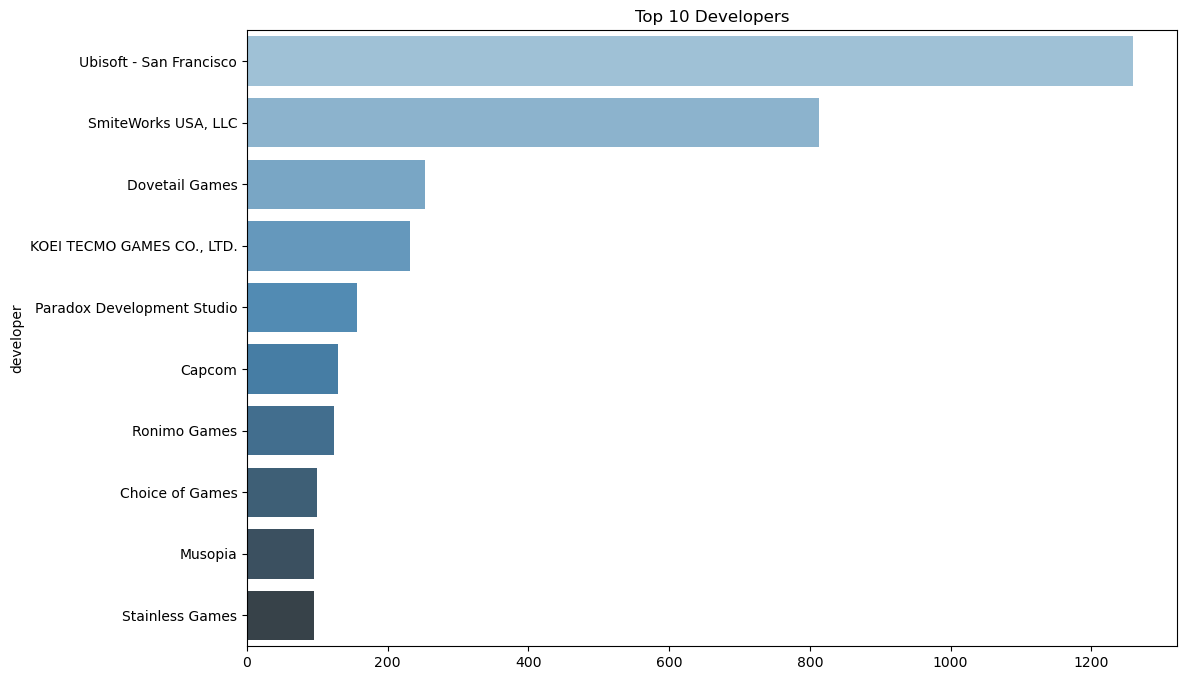

In [53]:
# Explorar con más detalle las variables categóricas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Frecuencia de developers
developer_count = games['developer'].value_counts()

# Take top N categories
N = 10
top_categories = developer_count.head(N)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues_d')
plt.title('Top 10 Developers')
plt.show()


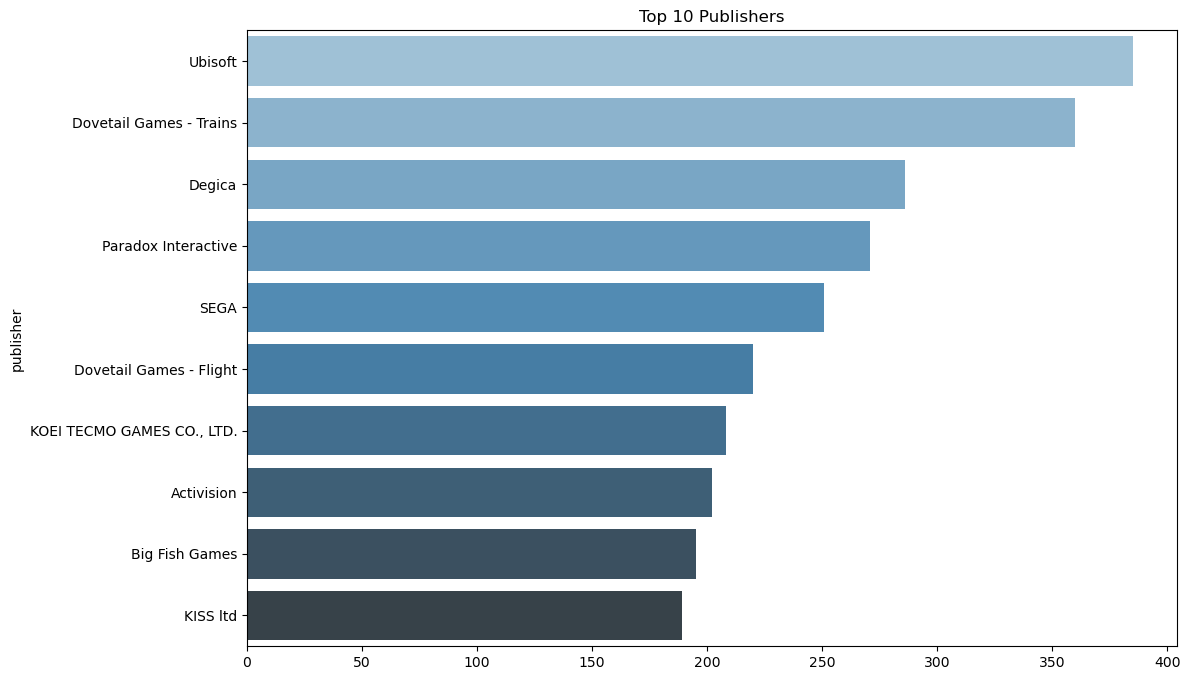

In [52]:
# Top 10 publisher
# Frecuencia de publishers
publisher_count = games['publisher'].value_counts()

# Top N categories
N = 10
top_categories = publisher_count.head(N)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues_d')
plt.title('Top 10 Publishers')
plt.show()

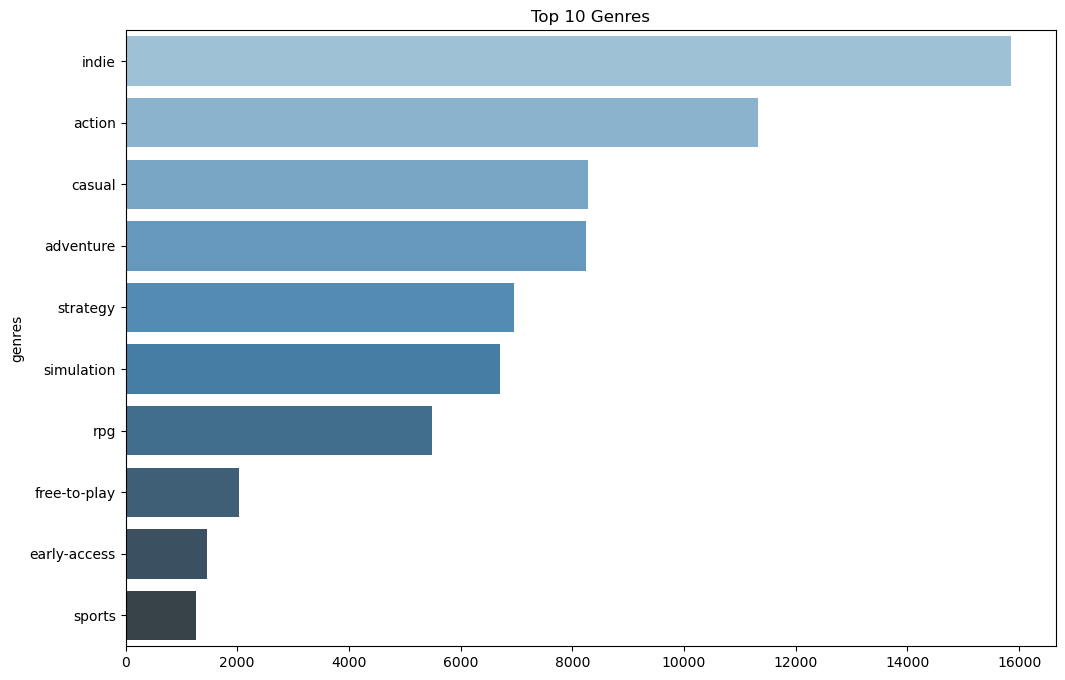

In [51]:
# Los géneros más comunes

# Split the genres, explode to individual rows, then use value_counts
games_genres = games['genres'].str.split().explode().value_counts()

# Top N categories
N = 10
top_categories = games_genres.head(N)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues_d')
plt.title('Top 10 Genres')
plt.show()

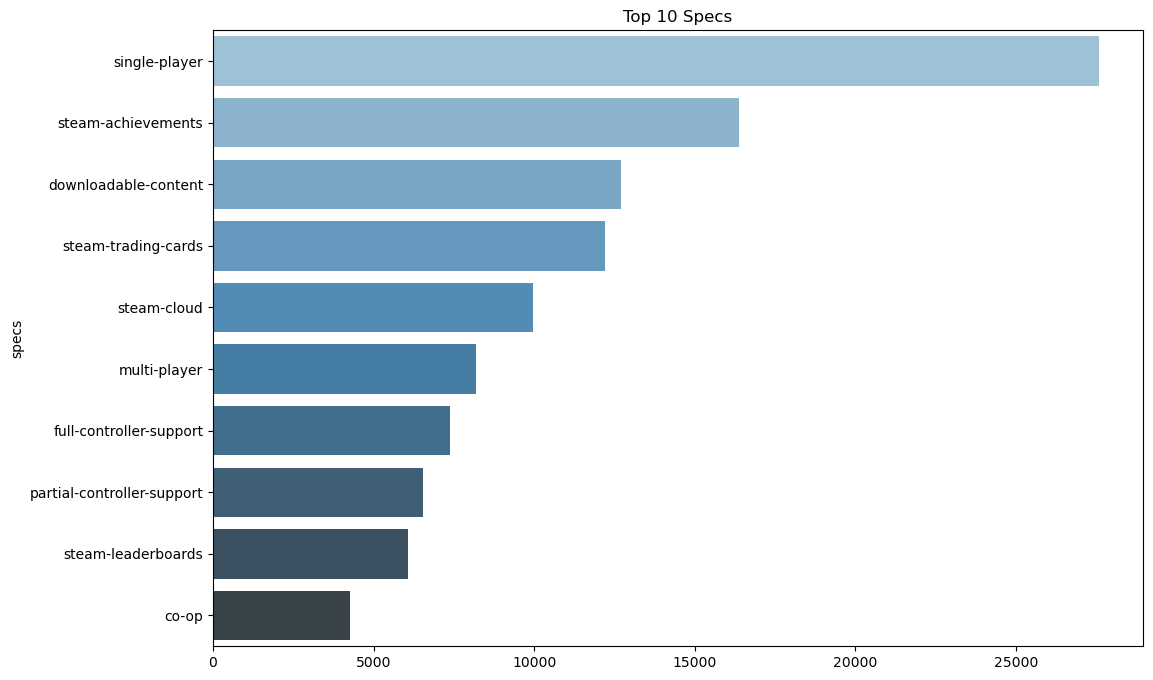

In [50]:
# Top 10 specs
# Split the specs, explode to individual rows, then use value_counts
games_specs = games['specs'].str.split().explode().value_counts()

# Top N categories
N = 10
top_categories = games_specs.head(N)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues_d')
plt.title('Top 10 Specs')
plt.show()

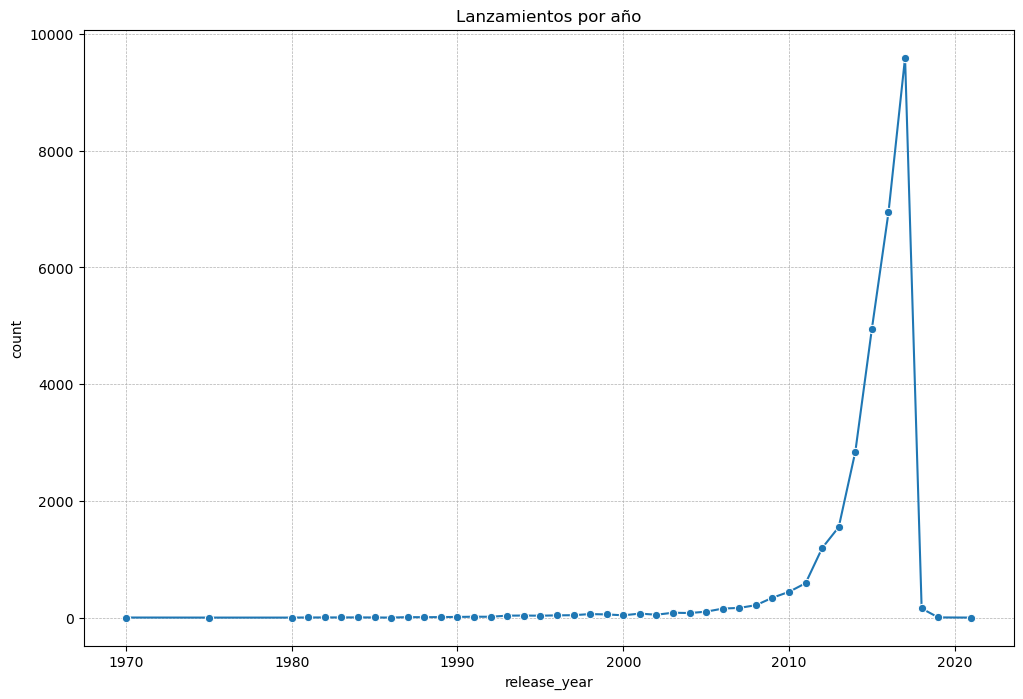

In [36]:
# Lanzamientos por año
games['release_year'] = games['date_fixed'].dt.year

# Group by year and count releases
yearly_releases = games.groupby('release_year').size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_releases, x='release_year', y='count', marker='o')
#plt.xlim(1990, 2023)  # Setting x-axis limits
plt.title('Lanzamientos por año')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## User_items df

In [37]:
# Leer df
user_items = pd.read_csv('datasets/aus_users_items.csv')
user_items.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6,0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0,0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7,0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0,0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0,0


In [42]:
#Hacer el EDA express con pandas_profiling (que ahora se llama ydata-profiling para instalar)

from ydata_profiling import ProfileReport

profile = ProfileReport(user_items, title='Pandas Profiling Report', explorative=True)
profile.to_file("output_eda_user_items.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Ahora exploraremos con más detalle las variables categóricas

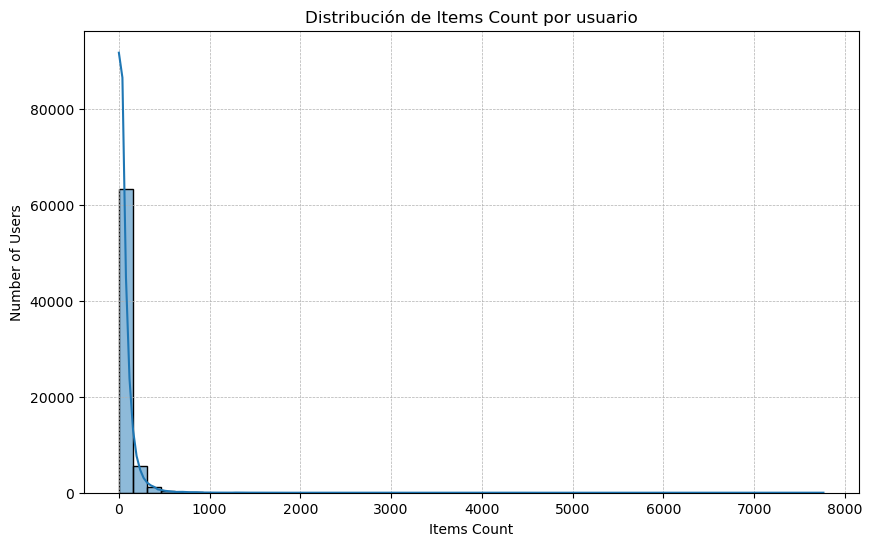

In [39]:
# Frecuencia de items_count

# Drop duplicates based on 'user_id' column and keep the first occurrence
unique_users = user_items.drop_duplicates(subset='user_id', keep='first')

# Plot distribution of 'items_count' for these unique users
plt.figure(figsize=(10,6))
sns.histplot(unique_users['items_count'], bins=50, kde=True)  # 'bins' can be adjusted based on the data's distribution
plt.title('Distribución de Items Count por usuario')
plt.xlabel('Items Count')
plt.ylabel('Number of Users')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


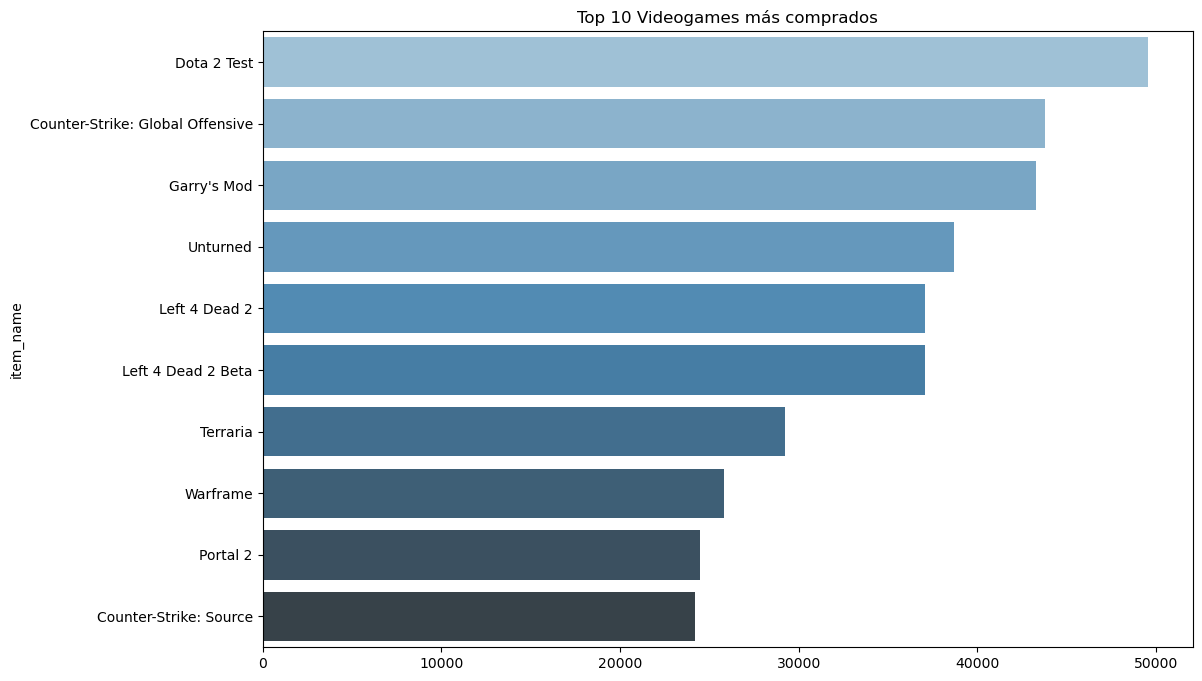

In [49]:
# Top 10 videojuegos más comprados
# Split the specs, explode to individual rows, then use value_counts
games_count = user_items['item_name'].value_counts()

# Top N categories
N = 10
top_categories = games_count.head(N)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues_d')
plt.title('Top 10 Videogames más comprados')
plt.show()

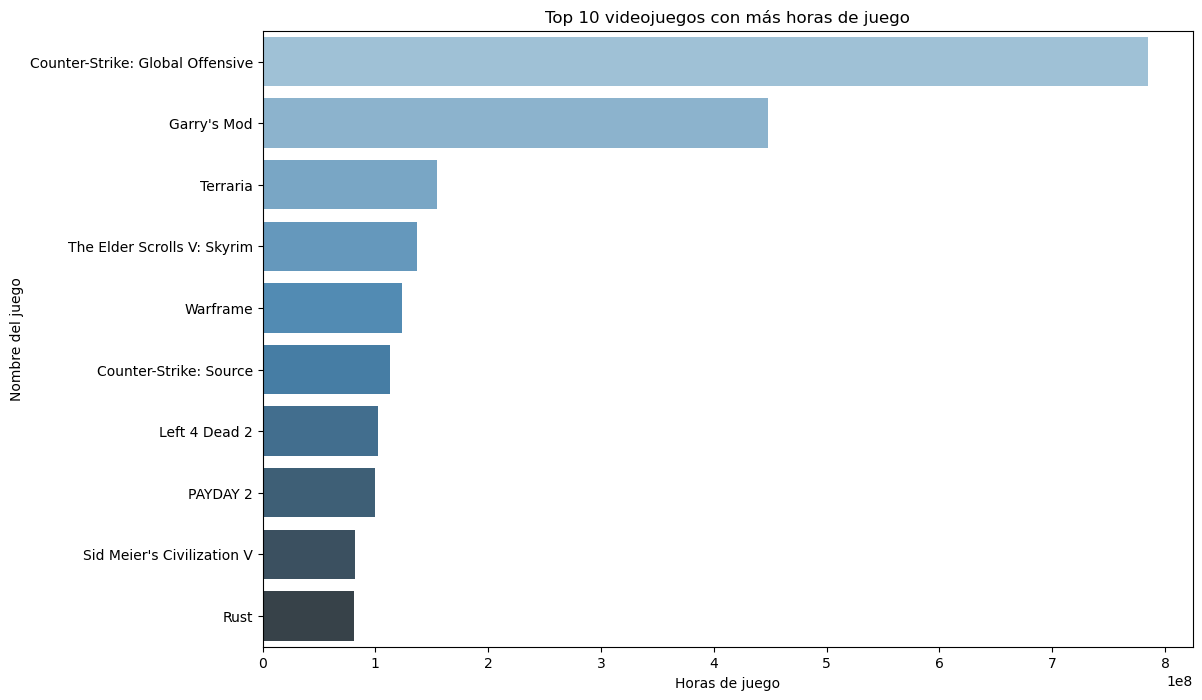

In [47]:
# Top 10 videojuegos con más horas de juego
# Agrupar por 'item_name', sumar las horas de juego y ordenar en orden descendente
top_games = user_items.groupby('item_name')['playtime_forever'].sum().sort_values(ascending=False)

# Tomar los primeros 10 juegos
top_10_games = top_games.head(10).reset_index()
top_10_games = top_10_games.sort_values(by='playtime_forever', ascending=False)

# Plotear el resultado con Seaborn
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_games, y='item_name', x='playtime_forever', palette='Blues_d')
plt.title('Top 10 videojuegos con más horas de juego')
plt.xlabel('Horas de juego')
plt.ylabel('Nombre del juego')
plt.show()




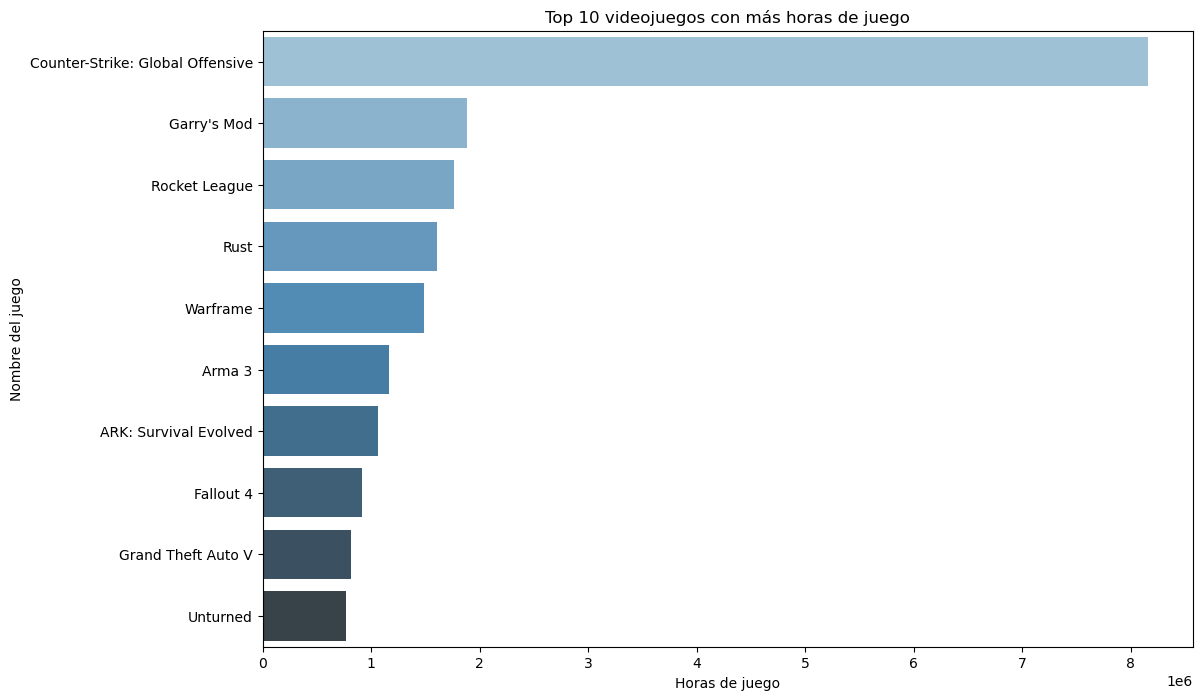

In [56]:
# Top 10 videojuegos con más horas de juego en las últimas dos semanas
# Agrupar por 'item_name', sumar las horas de juego y ordenar en orden descendente
top_games_w = user_items.groupby('item_name')['playtime_2weeks'].sum().sort_values(ascending=False)

# Tomar los primeros 10 juegos
top_10_games = top_games_w.head(10).reset_index()
top_10_games = top_10_games.sort_values(by='playtime_2weeks', ascending=False)

# Plotear el resultado con Seaborn
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_games, y='item_name', x='playtime_2weeks', palette='Blues_d')
plt.title('Top 10 videojuegos con más horas de juego')
plt.xlabel('Horas de juego')
plt.ylabel('Nombre del juego')
plt.show()

## User_reviews df

In [76]:
# Leer df
user_rev = pd.read_csv('datasets/aus_user_revs_clean.csv')
user_rev.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,2.0
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,2.0
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,2.0
3,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,2.0
4,js41637,http://steamcommunity.com/id/js41637,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,2.0


In [77]:
# Eliminar columnas no relevantes
user_rev.drop(columns=['user_url', 'last_edited', 'funny', 'helpful'], inplace=True)

In [78]:
user_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             59305 non-null  object 
 1   posted              59305 non-null  object 
 2   item_id             59305 non-null  int64  
 3   recommend           59305 non-null  bool   
 4   sentiment_analysis  59275 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [79]:
#Hacer el EDA express con pandas_profiling (que ahora se llama ydata-profiling para instalar)

from ydata_profiling import ProfileReport

profile = ProfileReport(user_rev, title='Pandas Profiling Report', explorative=True)
profile.to_file("output_eda_user_reviews.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

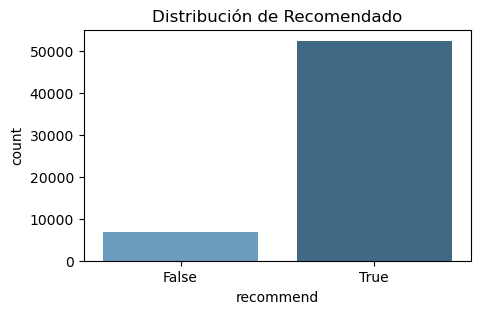

In [74]:
plt.figure(figsize=(5,3))
sns.countplot(data=user_rev, x='recommend', palette='Blues_d')
plt.title('Distribución de Recomendado')
plt.show()

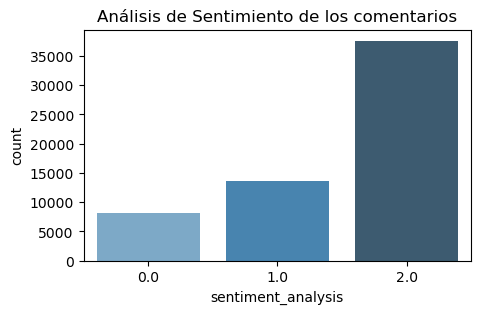

In [73]:
plt.figure(figsize=(5,3))
sns.countplot(data=user_rev, x='sentiment_analysis', palette='Blues_d')
plt.title('Análisis de Sentimiento de los comentarios')
plt.show()